In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
#import geopandas as gpd
import datetime

In [2]:
facets_ = pd.read_csv('MASTER_FACETS_DATA_AllColumns.csv')
#facets_

#print(len(facets_))

facets = facets_.drop(facets_[(facets_.Total_Population == 0)].index) # Dropped 116 Census Tracts.
#print(len(facets))

#any0 = facets[(facets.Total_Population == 0)]
#print(any0)

facets

,FIPS,Year,Urban,Total_Population,P_WH,P_AA,P_AI,P_AS,P_NH,P_OR,...,Walkscore,Walkscore_Percentile,Tob_Retailer_Per_1000,Felony_Per_1000,GINI,SVI_Themes_Total,SVI_Flags,Housing_Violations_Per_1000,Voter Turnout,Turnout Quartile
0,36005000100,2016,1.0,8430,0.14,0.58,0.000,0.02,0.0,0.24,...,0.0000,0.0,0.0,40.0,NaN,0.1104,3.0,NaN,0.19,1.0
1,36005000200,2016,1.0,5095,0.32,0.28,0.000,0.06,0.0,0.30,...,-2.9096,1.0,0.0,8.0,0.4024,0.7719,1.0,135.0000,0.19,1.0
2,36005000400,2016,1.0,5572,0.30,0.36,0.000,0.01,0.0,0.32,...,-2.7511,1.0,1.0,10.0,0.3659,0.6937,2.0,145.0000,0.19,1.0
3,36005001600,2016,1.0,5412,0.34,0.33,0.000,0.00,0.0,0.31,...,-2.2716,2.0,1.0,9.0,0.4898,0.9451,2.0,31.0000,0.20,1.0
4,36005001900,2016,1.0,2569,0.32,0.32,0.000,0.02,0.0,0.33,...,0.2115,3.0,1.0,43.0,0.4420,0.9554,6.0,178.0000,0.19,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,36085030301,2018,1.0,4897,0.59,0.13,0.000,0.19,0.0,0.06,...,-2.3185,1.0,1.0,17.0,0.4005,0.5165,0.0,0.5237,0.30,4.0
6496,36085030302,2018,1.0,6142,0.54,0.19,0.000,0.14,0.0,0.08,...,-1.8722,2.0,2.0,9.0,0.4038,0.4670,0.0,1.3825,0.30,4.0
6497,36085031901,2018,1.0,2564,0.25,0.61,0.000,0.07,0.0,0.07,...,-2.2547,2.0,0.0,35.0,0.5083,0.9086,4.0,1.1520,0.30,4.0
6498,36085031902,2018,1.0,4480,0.30,0.61,0.009,0.01,0.0,0.05,...,-3.8478,1.0,1.0,15.0,0.5671,0.8321,2.0,12.0023,0.30,4.0


In [3]:
facets['fel_one'] = facets['Felony_Per_1000'].div(1000).multiply(facets['Total_Population']) 
facets.head()

facets['house_one'] = facets['Housing_Violations_Per_1000'].div(1000).multiply(facets['Total_Population']) 
facets.head()


,FIPS,Year,Urban,Total_Population,P_WH,P_AA,P_AI,P_AS,P_NH,P_OR,...,Tob_Retailer_Per_1000,Felony_Per_1000,GINI,SVI_Themes_Total,SVI_Flags,Housing_Violations_Per_1000,Voter Turnout,Turnout Quartile,fel_one,house_one
0,36005000100,2016,1.0,8430,0.14,0.58,0.0,0.02,0.0,0.24,...,0.0,40.0,NaN,0.1104,3.0,NaN,0.19,1.0,337.200,NaN
1,36005000200,2016,1.0,5095,0.32,0.28,0.0,0.06,0.0,0.30,...,0.0,8.0,0.4024,0.7719,1.0,135.0,0.19,1.0,40.760,687.825
2,36005000400,2016,1.0,5572,0.30,0.36,0.0,0.01,0.0,0.32,...,1.0,10.0,0.3659,0.6937,2.0,145.0,0.19,1.0,55.720,807.940
3,36005001600,2016,1.0,5412,0.34,0.33,0.0,0.00,0.0,0.31,...,1.0,9.0,0.4898,0.9451,2.0,31.0,0.20,1.0,48.708,167.772
4,36005001900,2016,1.0,2569,0.32,0.32,0.0,0.02,0.0,0.33,...,1.0,43.0,0.4420,0.9554,6.0,178.0,0.19,1.0,110.467,457.282


In [4]:
facets[facets.MED_HH_Income == "250,000+"]
facets.loc[facets.MED_HH_Income == "250,000+", "MED_HH_Income"]="250000"
facets[facets.MED_HH_Income == "250000"]

facets.loc[:,"MED_HH_Income"] = facets["MED_HH_Income"].astype(str).astype(float)
#print(facets.dtypes)

C:\Users\tessa\AppData\Local\Temp\ipykernel_17208\961131490.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  facets.loc[:,"MED_HH_Income"] = facets["MED_HH_Income"].astype(str).astype(float)


In [5]:

county_dict = {'Bronx County':36005,'Kings County': 36047, 
               'New York County': 36061, 'Queens County':36081, 'Richmond County': 36085 }
County_df = pd.DataFrame.from_dict(county_dict,orient='index',columns=["FIPS_code"])
county = ['Bronx County','Kings County', 'New York County', 'Queens County', 'Richmond County']
city = ['Bronx','Brooklyn','Manhattan','Queens','Staten_Island']
County_df['City'] = city
County_df['County'] = county
County_df.head()

fips_list = facets['FIPS'].tolist()
#fips_list
fips_str = map(str,fips_list)
fips_str_list = list(fips_str)

def five_digits(num):
    return int(str(num[:5]))

fips_result = [five_digits(n) for n in fips_str_list]
#print(fips_result)

facets['FIPS_code'] = fips_result
facets_county = facets.merge(County_df, on=['FIPS_code'])
facets_county

,FIPS,Year,Urban,Total_Population,P_WH,P_AA,P_AI,P_AS,P_NH,P_OR,...,SVI_Themes_Total,SVI_Flags,Housing_Violations_Per_1000,Voter Turnout,Turnout Quartile,fel_one,house_one,FIPS_code,City,County
0,36005000100,2016,1.0,8430,0.14,0.58,0.000,0.02,0.0,0.24,...,0.1104,3.0,NaN,0.19,1.0,337.200,NaN,36005,Bronx,Bronx County
1,36005000200,2016,1.0,5095,0.32,0.28,0.000,0.06,0.0,0.30,...,0.7719,1.0,135.0000,0.19,1.0,40.760,687.825000,36005,Bronx,Bronx County
2,36005000400,2016,1.0,5572,0.30,0.36,0.000,0.01,0.0,0.32,...,0.6937,2.0,145.0000,0.19,1.0,55.720,807.940000,36005,Bronx,Bronx County
3,36005001600,2016,1.0,5412,0.34,0.33,0.000,0.00,0.0,0.31,...,0.9451,2.0,31.0000,0.20,1.0,48.708,167.772000,36005,Bronx,Bronx County
4,36005001900,2016,1.0,2569,0.32,0.32,0.000,0.02,0.0,0.33,...,0.9554,6.0,178.0000,0.19,1.0,110.467,457.282000,36005,Bronx,Bronx County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6380,36085030301,2018,1.0,4897,0.59,0.13,0.000,0.19,0.0,0.06,...,0.5165,0.0,0.5237,0.30,4.0,83.249,2.564559,36085,Staten_Island,Richmond County
6381,36085030302,2018,1.0,6142,0.54,0.19,0.000,0.14,0.0,0.08,...,0.4670,0.0,1.3825,0.30,4.0,55.278,8.491315,36085,Staten_Island,Richmond County
6382,36085031901,2018,1.0,2564,0.25,0.61,0.000,0.07,0.0,0.07,...,0.9086,4.0,1.1520,0.30,4.0,89.740,2.953728,36085,Staten_Island,Richmond County
6383,36085031902,2018,1.0,4480,0.30,0.61,0.009,0.01,0.0,0.05,...,0.8321,2.0,12.0023,0.30,4.0,67.200,53.770304,36085,Staten_Island,Richmond County


In [6]:
mental_health = facets_county.iloc[:,[0,1,3,24,25,42,43,46,49,50,52,53]].copy()

datatypes = mental_health.dtypes
print(datatypes)
mental_health

mental_health.shape

FIPS                             int64
Year                             int64
Total_Population                 int64
Poverty_Rate                   float64
MED_HH_Income                  float64
Felony_Per_1000                float64
GINI                           float64
Housing_Violations_Per_1000    float64
fel_one                        float64
house_one                      float64
County                          object
dtype: object


(6385, 11)

In [7]:
mental_health[["Total_Population","Poverty_Rate", "MED_HH_Income","Felony_Per_1000",
               "GINI","Housing_Violations_Per_1000","fel_one","house_one"]].describe()

,Total_Population,Poverty_Rate,MED_HH_Income,Felony_Per_1000,GINI,Housing_Violations_Per_1000,fel_one,house_one
count,6385.000000,6375.000000,6316.000000,6369.000000,6337.000000,5727.000000,6369.000000,5727.000000
mean,3953.577604,0.195319,59678.697277,51.833726,0.453825,71.756139,167.308531,310.877803
std,2196.715908,0.131834,29392.449593,550.735166,0.064689,178.954187,346.809485,1349.662185
min,1.000000,0.000000,9327.000000,0.000000,0.125100,0.000000,0.000000,0.000000
25%,2423.000000,0.090000,39468.000000,9.000000,0.409600,0.102200,28.728000,0.311109
50%,3590.000000,0.170000,55181.500000,17.000000,0.449000,0.420500,60.576000,1.776262
75%,4995.000000,0.270000,74099.500000,43.000000,0.491000,40.000000,144.274000,129.908500
max,29256.000000,1.000000,250000.000000,41000.000000,0.690500,2714.000000,9661.284000,78236.478000


In [8]:
null_mental = mental_health.isnull().sum()
print(null_mental)

len(mental_health.index) # Highest Null values is at 10% (Housing_Violations_Per_1000), none need to be removed.

FIPS                             0
Year                             0
Total_Population                 0
Poverty_Rate                    10
MED_HH_Income                   69
Felony_Per_1000                 16
GINI                            48
Housing_Violations_Per_1000    658
fel_one                         16
house_one                      658
County                           0
dtype: int64


6385

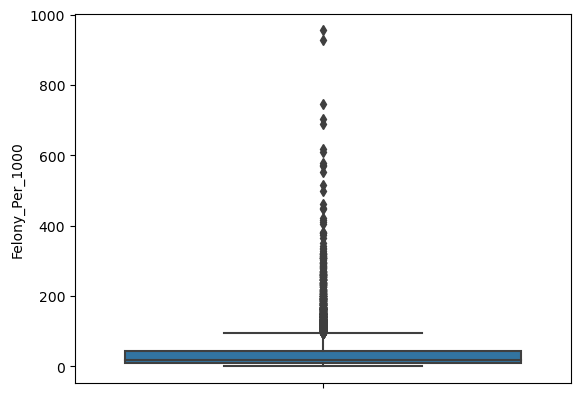

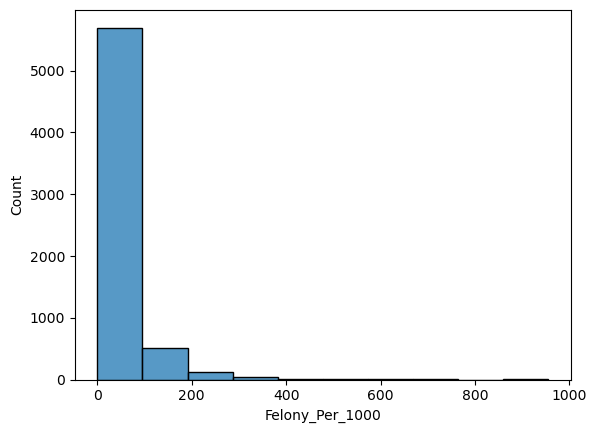

In [15]:
mental_health['Felony_Per_1000'] = mental_health['Felony_Per_1000'].fillna(mental_health['Felony_Per_1000'].mean())

mental_health.at[320,'Felony_Per_1000']=np.nan
mental_health.at[992,'Felony_Per_1000']=np.nan
mental_health.at[3128,'Felony_Per_1000']=np.nan
mental_health.at[3354,'Felony_Per_1000']=np.nan
mental_health.at[3366,'Felony_Per_1000']=np.nan
mental_health.at[3372,'Felony_Per_1000']=np.nan
mental_health.at[3917,'Felony_Per_1000']=np.nan
mental_health.at[3919,'Felony_Per_1000']=np.nan
mental_health.at[3931,'Felony_Per_1000']=np.nan
mental_health.at[3937,'Felony_Per_1000']=np.nan
mental_health.at[3966,'Felony_Per_1000']=np.nan
mental_health.at[4047,'Felony_Per_1000']=np.nan
mental_health.at[4103,'Felony_Per_1000']=np.nan
mental_health.at[5571,'Felony_Per_1000']=np.nan
mental_health.at[5806,'Felony_Per_1000']=np.nan

mental_health['Felony_Per_1000'] = mental_health['Felony_Per_1000'].fillna(mental_health['Felony_Per_1000'].mean())

sns.boxplot(mental_health,y='Felony_Per_1000')
plt.show()
sns.histplot(mental_health,x='Felony_Per_1000',bins=10)
plt.show()

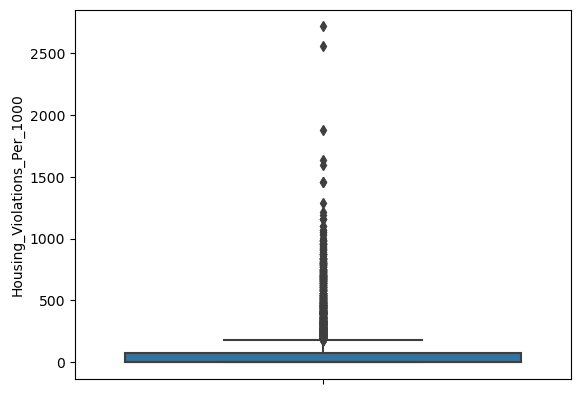

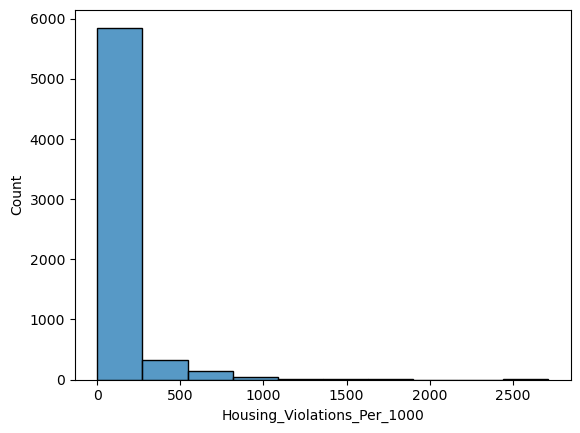

In [10]:
mental_health['Housing_Violations_Per_1000'] = mental_health['Housing_Violations_Per_1000'].fillna(mental_health['Housing_Violations_Per_1000'].mean())

mental_health.at[320,"Housing_Violations_Per_1000"]=np.nan
mental_health.at[3352,"Housing_Violations_Per_1000"]=np.nan

mental_health['Housing_Violations_Per_1000'] = mental_health['Housing_Violations_Per_1000'].fillna(mental_health['Housing_Violations_Per_1000'].mean())

sns.boxplot(mental_health, y='Housing_Violations_Per_1000')
plt.show()
sns.histplot(mental_health, x='Housing_Violations_Per_1000', bins=10)
plt.show()

In [11]:
mental_health[["Total_Population","Poverty_Rate", "MED_HH_Income","Felony_Per_1000",
               "GINI","Housing_Violations_Per_1000","fel_one","house_one"]].describe()

,Total_Population,Poverty_Rate,MED_HH_Income,Felony_Per_1000,GINI,Housing_Violations_Per_1000,fel_one,house_one
count,6385.000000,6375.000000,6316.000000,6385.000000,6337.000000,6385.000000,6369.000000,5727.000000
mean,3953.577604,0.195319,59678.697277,38.953272,0.453825,71.600963,167.308531,310.877803
std,2196.715908,0.131834,29392.449593,58.874373,0.064689,169.213304,346.809485,1349.662185
min,1.000000,0.000000,9327.000000,0.000000,0.125100,0.000000,0.000000,0.000000
25%,2423.000000,0.090000,39468.000000,9.000000,0.409600,0.121100,28.728000,0.311109
50%,3590.000000,0.170000,55181.500000,17.000000,0.449000,0.614700,60.576000,1.776262
75%,4995.000000,0.270000,74099.500000,43.000000,0.491000,71.756139,144.274000,129.908500
max,29256.000000,1.000000,250000.000000,955.000000,0.690500,2714.000000,9661.284000,78236.478000


In [12]:
mental_health['Poverty_Rate'] = mental_health['Poverty_Rate'].fillna(mental_health['Poverty_Rate'].mean())

mental_health['MED_HH_Income'] = mental_health['MED_HH_Income'].fillna(mental_health['MED_HH_Income'].mean())

mental_health['GINI'] = mental_health['GINI'].fillna(mental_health['GINI'].mean())

In [13]:
mental_health[["Total_Population","Poverty_Rate", "MED_HH_Income","Felony_Per_1000",
               "GINI","Housing_Violations_Per_1000","fel_one","house_one"]].describe()

,Total_Population,Poverty_Rate,MED_HH_Income,Felony_Per_1000,GINI,Housing_Violations_Per_1000,fel_one,house_one
count,6385.000000,6385.000000,6385.000000,6385.000000,6385.000000,6385.000000,6369.000000,5727.000000
mean,3953.577604,0.195319,59678.697277,38.953272,0.453825,71.600963,167.308531,310.877803
std,2196.715908,0.131731,29233.177283,58.874373,0.064445,169.213304,346.809485,1349.662185
min,1.000000,0.000000,9327.000000,0.000000,0.125100,0.000000,0.000000,0.000000
25%,2423.000000,0.090000,39688.000000,9.000000,0.410000,0.121100,28.728000,0.311109
50%,3590.000000,0.170000,55625.000000,17.000000,0.449700,0.614700,60.576000,1.776262
75%,4995.000000,0.270000,73790.000000,43.000000,0.490600,71.756139,144.274000,129.908500
max,29256.000000,1.000000,250000.000000,955.000000,0.690500,2714.000000,9661.284000,78236.478000


In [16]:
meanfill_mental = mental_health.isnull().sum()
print(meanfill_mental)

FIPS                             0
Year                             0
Total_Population                 0
Poverty_Rate                     0
MED_HH_Income                    0
Felony_Per_1000                  0
GINI                             0
Housing_Violations_Per_1000      0
fel_one                         16
house_one                      658
County                           0
dtype: int64
